In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.feature_extraction import EfficientFCParameters

In [2]:
df=pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\train_FD002.txt', delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [3]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
df.columns=columns
df['max_time']=df.groupby('unit')['time'].transform('max')
df['remaining_time']=df['max_time']-df['time']
df['label']=df['remaining_time'].clip(upper=130)
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,9.3461,0.02,334,2223,100.00,14.73,8.8071,149,148,130
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,9.3774,0.02,330,2212,100.00,10.41,6.2665,149,147,130
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,10.8941,0.02,309,1915,84.93,14.08,8.6723,149,146,130
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,9.3528,0.02,329,2212,100.00,10.59,6.4701,149,145,130
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,10.8963,0.02,309,1915,84.93,14.13,8.5286,149,144,130


In [6]:
window_size = 60

rolled_df = roll_time_series(
    df,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=5,
    rolling_direction=1
)

rolled_df

Rolling: 100%|██████████| 54/54 [00:10<00:00,  5.08it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label,id
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,0.02,334,2223,100.00,14.73,8.8071,149,148,130,"(1, 6)"
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,0.02,330,2212,100.00,10.41,6.2665,149,147,130,"(1, 6)"
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,0.02,309,1915,84.93,14.08,8.6723,149,146,130,"(1, 6)"
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,0.02,329,2212,100.00,10.59,6.4701,149,145,130,"(1, 6)"
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,0.02,309,1915,84.93,14.13,8.5286,149,144,130,"(1, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748175,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,0.03,369,2324,100.00,24.36,14.5189,316,4,4,"(260, 316)"
2748176,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,0.03,374,2319,100.00,28.10,16.9454,316,3,3,"(260, 316)"
2748177,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,0.02,310,1915,84.93,14.19,8.5503,316,2,2,"(260, 316)"
2748178,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,0.02,311,1915,84.93,14.05,8.3729,316,1,1,"(260, 316)"


In [7]:
selected_cols=['id',
               'sr1', 'sr2', 'sr3', 'sr4', 'sr5',
               'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
                'sr11', 'sr12', 'sr13', 'sr14', 'sr15',
                'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']

In [8]:
selected_df=rolled_df[selected_cols]
selected_df

,id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 6)",449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,"(1, 6)",445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,"(1, 6)",462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,1915.11,8001.42,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,"(1, 6)",445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,"(1, 6)",462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,1915.10,7993.23,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748175,"(260, 316)",491.19,608.79,1495.60,1269.51,9.35,13.66,334.00,2324.92,8852.27,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
2748176,"(260, 316)",489.05,605.81,1514.32,1324.12,10.52,15.50,392.46,2319.17,8915.86,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
2748177,"(260, 316)",462.54,537.48,1276.24,1057.92,7.05,9.04,175.11,1917.37,8114.33,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
2748178,"(260, 316)",462.54,537.84,1272.95,1066.30,7.05,9.04,174.81,1917.36,8112.63,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [9]:
unique_ids = selected_df['id'].unique()

# Split the unique ids into two halves
midpoint = len(unique_ids) // 2
first_half_ids = unique_ids[:midpoint]  # First half of unique ids
second_half_ids = unique_ids[midpoint:]  # Second half of unique ids

# Filter the DataFrame for each half based on the unique ids
first_half_df = selected_df[selected_df['id'].isin(first_half_ids)]
second_half_df = selected_df[selected_df['id'].isin(second_half_ids)]

print(len(first_half_df)+ len(second_half_df))

2761440


In [10]:
first_half_df

,id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 6)",449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,"(1, 6)",445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,"(1, 6)",462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,1915.11,8001.42,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,"(1, 6)",445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,"(1, 6)",462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,1915.10,7993.23,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51241,"(131, 26)",445.00,549.34,1349.90,1117.43,3.91,5.72,139.17,2211.81,8319.70,...,130.70,2387.96,8085.53,9.3415,0.02,331,2212,100.00,10.70,6.4248
51242,"(131, 26)",489.05,604.90,1496.89,1301.87,10.52,15.49,395.08,2318.89,8768.63,...,371.94,2388.04,8118.74,8.6318,0.03,369,2319,100.00,28.64,17.2388
51243,"(131, 26)",491.19,607.64,1486.40,1243.78,9.35,13.65,334.78,2323.90,8728.91,...,315.63,2388.05,8058.19,9.1741,0.02,365,2324,100.00,24.73,14.7818
51244,"(131, 26)",449.44,555.20,1363.89,1125.70,5.48,8.00,194.34,2222.87,8342.42,...,183.02,2387.95,8067.96,9.2625,0.02,333,2223,100.00,14.83,8.9390


In [11]:
second_half_df

,id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
58110,"(131, 27)",445.00,548.77,1355.19,1124.01,3.91,5.71,138.37,2211.86,8322.08,...,131.11,2387.97,8083.07,9.3369,0.02,328,2212,100.00,10.50,6.3679
58111,"(131, 27)",445.00,549.12,1356.03,1118.15,3.91,5.71,138.39,2211.78,8321.62,...,130.82,2387.90,8074.19,9.3423,0.02,329,2212,100.00,10.59,6.4255
58112,"(131, 27)",518.67,642.63,1585.02,1395.48,14.62,21.61,553.79,2388.11,9044.62,...,521.88,2388.02,8135.08,8.4228,0.03,393,2388,100.00,39.01,23.4155
58113,"(131, 27)",518.67,641.90,1580.80,1399.71,14.62,21.61,554.79,2388.04,9044.55,...,522.58,2388.03,8132.31,8.4028,0.03,395,2388,100.00,39.01,23.3156
58114,"(131, 27)",491.19,607.07,1479.34,1242.09,9.35,13.65,334.80,2323.90,8718.26,...,315.64,2388.03,8055.53,9.2115,0.02,364,2324,100.00,24.36,14.9172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748175,"(260, 316)",491.19,608.79,1495.60,1269.51,9.35,13.66,334.00,2324.92,8852.27,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
2748176,"(260, 316)",489.05,605.81,1514.32,1324.12,10.52,15.50,392.46,2319.17,8915.86,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
2748177,"(260, 316)",462.54,537.48,1276.24,1057.92,7.05,9.04,175.11,1917.37,8114.33,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
2748178,"(260, 316)",462.54,537.84,1272.95,1066.30,7.05,9.04,174.81,1917.36,8112.63,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [12]:
extraction_settings = EfficientFCParameters()
X1=extract_features(
    first_half_df,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
X1

Feature Extraction: 100%|██████████| 60/60 [28:45<00:00, 28.76s/it]  


sr1__variance_larger_than_standard_deviation  sr1__has_duplicate_max  \
1   6                                            1.0                     1.0   
    7                                            1.0                     1.0   
    8                                            1.0                     0.0   
    9                                            1.0                     0.0   
    10                                           1.0                     0.0   
...                                              ...                     ...   
131 22                                           1.0                     1.0   
    23                                           1.0                     1.0   
    24                                           1.0                     1.0   
    25                                           1.0                     1.0   
    26                                           1.0                     1.0   

        sr1__has_duplicate_min  sr1__has_duplicate  sr1__sum_values  \
1   6                      1.0                 1.0          2727.06   
    7                      1.0                 1.0          3172.06   
    8                      1.0                 1.0          3663.25   
    9                      1.0                 1.0          4108.25   
    10                     1.0                 1.0          4553.25   
...                        ...                 ...              ...   
131 22                     1.0                 1.0         10612.66   
    23                     1.0                 1.0         11101.71   
    24                     1.0                 1.0         11592.90   
    25                     1.0                 1.0         12042.34   
    26                     1.0                 1.0         12491.78   

        sr1__abs_energy  sr1__mean_abs_change  sr1__mean_change  \
1   6      1.239876e+06             11.412000          2.620000   
    7      1.437901e+06             12.433333         -0.740000   
    8      1.679169e+06             17.255714          5.964286   
    9      1.877194e+06             20.872500         -0.555000   
    10     2.075219e+06             18.553333         -0.493333   
...                 ...                   ...               ...   
131 22     5.138077e+06             23.758095          0.000000   
    23     5.377247e+06             24.680455          2.002273   
    24     5.618515e+06             23.700435          2.008261   
    25     5.820511e+06             24.452500          0.185000   
    26     6.022508e+06             23.474400          0.177600   

        sr1__mean_second_derivative_central  sr1__median  ...  \
1   6                              0.555000       455.99  ...   
    7                             -1.310000       449.44  ...   
    8                              4.219167       455.99  ...   
    9                             -2.982143       449.44  ...   
    10                             0.277500       447.22  ...   
...                                     ...          ...  ...   
131 22                             0.000000       490.12  ...   
    23                             1.048810       489.05  ...   
    24                             0.048636       490.12  ...   
    25                            -0.907609       489.05  ...   
    26                             0.000000       489.05  ...   

        sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
1   6                        0.693147                        1.039721   
    7                        1.039721                        1.386294   
    8                        0.950271                        1.332179   
    9                        1.054920                        1.332179   
    10                       0.867563                        1.242453   
...                               ...                             ...   
131 22                       0.887694                        1.314374   
    23                  

In [13]:
extraction_settings = EfficientFCParameters()
X2=extract_features(
    second_half_df,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
X2

Feature Extraction: 100%|██████████| 60/60 [28:55<00:00, 28.92s/it]  
c:\Users\owner\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['sr17__fft_coefficient__attr_"real"__coeff_31'
 'sr17__fft_coefficient__attr_"real"__coeff_32'
 'sr17__fft_coefficient__attr_"real"__coeff_33' ...
 'sr16__friedrich_coefficients__coeff_3__m_3__r_30'
 'sr16__max_langevin_fixed_point__m_3__r_30'
 'sr16__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


sr17__variance_larger_than_standard_deviation  \
131 27                                             1.0   
    28                                             1.0   
    29                                             1.0   
    30                                             1.0   
    31                                             1.0   
...                                                ...   
260 312                                            1.0   
    313                                            1.0   
    314                                            1.0   
    315                                            1.0   
    316                                            1.0   

         sr17__has_duplicate_max  sr17__has_duplicate_min  \
131 27                       0.0                      0.0   
    28                       0.0                      1.0   
    29                       0.0                      1.0   
    30                       0.0                      0.0   
    31                       0.0                      0.0   
...                          ...                      ...   
260 312                      0.0                      0.0   
    313                      0.0                      0.0   
    314                      0.0                      0.0   
    315                      0.0                      0.0   
    316                      0.0                      0.0   

         sr17__has_duplicate  sr17__sum_values  sr17__abs_energy  \
131 27                   1.0            9620.0         3445550.0   
    28                   1.0            9927.0         3539799.0   
    29                   1.0           10319.0         3693463.0   
    30                   1.0           10625.0         3787099.0   
    31                   1.0           10995.0         3923999.0   
...                      ...               ...               ...   
260 312                  1.0           20978.0         7385962.0   
    313                  1.0           20982.0         7388938.0   
    314                  1.0           20962.0         7376138.0   
    315                  1.0           20907.0         7338903.0   
    316                  1.0           20851.0         7297911.0   

         sr17__mean_abs_change  sr17__mean_change  \
131 27               20.730769           0.115385   
    28               20.851852          -0.777778   
    29               23.142857           2.285714   
    30               25.310345          -0.758621   
    31               26.600000           1.400000   
...                        ...                ...   
260 312              31.440678          -0.016949   
    313              30.847458           0.745763   
    314              31.322034          -0.949153   
    315              30.864407          -1.406780   
    316              31.288136          -0.915254   

         sr17__mean_second_derivative_central  sr17__median  ...  \
131 27                              -0.060000         363.0  ...   
    28                              -0.480769         363.0  ...   
    29                               1.555556         363.0  ...   
    30                              -1.553571         363.0  ...   
    31                               1.086207         363.0  ...   
...                                       ...           ...  ...   
260 312                              0.112069         335.5  ...   
    313                             -0.267241         335.5  ...   
    314                             -0.793103         335.5  ...   
    315                              0.025862         335.0  ...   
    316                              0.224138         335.0  ...   

         sr16__fourier_entropy__bins_5  sr16__fourier_entropy__bins_10  \
131 27                        1.170997                        1.809514   
    28                        1.171060                        1.806507   
    29                        1.270028                        1.714088   
    30      

In [14]:
X = pd.concat([X1, X2], axis=0)
X

sr1__variance_larger_than_standard_deviation  sr1__has_duplicate_max  \
1   6                                             1.0                     1.0   
    7                                             1.0                     1.0   
    8                                             1.0                     0.0   
    9                                             1.0                     0.0   
    10                                            1.0                     0.0   
...                                               ...                     ...   
260 312                                           1.0                     1.0   
    313                                           1.0                     1.0   
    314                                           1.0                     1.0   
    315                                           1.0                     1.0   
    316                                           1.0                     1.0   

         sr1__has_duplicate_min  sr1__has_duplicate  sr1__sum_values  \
1   6                       1.0                 1.0          2727.06   
    7                       1.0                 1.0          3172.06   
    8                       1.0                 1.0          3663.25   
    9                       1.0                 1.0          4108.25   
    10                      1.0                 1.0          4553.25   
...                         ...                 ...              ...   
260 312                     1.0                 1.0         28392.58   
    313                     1.0                 1.0         28392.58   
    314                     1.0                 1.0         28410.12   
    315                     1.0                 1.0         28381.47   
    316                     1.0                 1.0         28312.24   

         sr1__abs_energy  sr1__mean_abs_change  sr1__mean_change  \
1   6       1.239876e+06             11.412000          2.620000   
    7       1.437901e+06             12.433333         -0.740000   
    8       1.679169e+06             17.255714          5.964286   
    9       1.877194e+06             20.872500         -0.555000   
    10      2.075219e+06             18.553333         -0.493333   
...                  ...                   ...               ...   
260 312     1.348127e+07             27.781017          0.036271   
    313     1.348127e+07             27.070678          0.746610   
    314     1.349719e+07             26.737119         -0.485593   
    315     1.346986e+07             26.271356         -0.951356   
    316     1.340284e+07             26.493390         -1.173390   

         sr1__mean_second_derivative_central  sr1__median  ...  \
1   6                               0.555000       455.99  ...   
    7                              -1.310000       449.44  ...   
    8                               4.219167       455.99  ...   
    9                              -2.982143       449.44  ...   
    10                              0.277500       447.22  ...   
...                                      ...          ...  ...   
260 312                             0.142845       462.54  ...   
    313                            -0.416638       462.54  ...   
    314                            -0.465431       462.54  ...   
    315                             0.000000       462.54  ...   
    316                            -0.112931       462.54  ...   

         sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
1   6                         0.693147                        1.039721   
    7                         1.039721                        1.386294   
    8                         0.950271                        1.332179   
    9                         1.054920                        1.332179   
    10                        0.867563                        1.242453   
...                                ...                             ...   
260 312                       1.419548     

In [15]:
y=rolled_df.groupby('id')['label'].last()

In [16]:
X_filtered=select_features(X, y)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler().fit(X_filtered)
minmax = MinMaxScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)

# Convert the scaled data back to a DataFrame if needed
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

# Display the scaled DataFrame
relevant_features_scaled_df.head()

,sr1__sum_values,sr11__quantile__q_0.3,sr11__quantile__q_0.4,sr11__quantile__q_0.6,sr11__quantile__q_0.7,sr11__quantile__q_0.8,sr11__quantile__q_0.9,"sr11__agg_autocorrelation__f_agg_""mean""__maxlag_40","sr11__agg_autocorrelation__f_agg_""var""__maxlag_40",sr11__number_cwt_peaks__n_1,...,"sr20__fft_coefficient__attr_""real""__coeff_30","sr17__fft_coefficient__attr_""real""__coeff_25","sr13__fft_coefficient__attr_""angle""__coeff_3","sr4__fft_coefficient__attr_""angle""__coeff_19","sr7__fft_coefficient__attr_""real""__coeff_30","sr21__fft_coefficient__attr_""real""__coeff_30","sr12__fft_coefficient__attr_""real""__coeff_30","sr1__fft_coefficient__attr_""real""__coeff_25","sr20__cwt_coefficients__coeff_11__w_2__widths_(2, 5, 10, 20)","sr21__cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20)"
0,-3.210055,-10.806776,-11.854504,-2.068237,-4.337386,-4.969954,-6.292103,-9.206363,2.464159,-3.007584,...,-0.000057,0.005037,1.721170,0.006062,-0.000287,-0.001241,-0.001266,0.008197,-0.026526,-0.032913
1,-3.145613,-10.737135,-7.260533,-2.030301,-4.239534,-4.780722,-6.184524,-1.071234,2.843044,-3.007584,...,-0.000057,0.005037,-1.303033,0.006062,-0.000287,-0.001241,-0.001266,0.008197,-0.026526,-0.032913
2,-3.074481,-9.620764,-2.666561,-1.969181,-4.057590,-4.725066,-5.381517,0.370265,2.045376,-2.682093,...,-0.000057,0.005037,-0.766456,0.006062,-0.000287,-0.001241,-0.001266,0.008197,-0.026526,-0.032913
3,-3.010039,-6.410932,-0.342392,-1.861694,-4.022424,-4.663844,-5.544168,-0.461574,0.645098,-2.682093,...,-0.000057,0.005037,-0.286190,0.006062,-0.000287,-0.001241,-0.001266,0.008197,-0.026526,-0.032913
4,-2.945596,-3.201101,-0.288025,-1.933352,-4.027011,-4.691672,-5.796468,-0.813604,0.337791,-2.682093,...,-0.000057,0.005037,0.130670,0.006062,-0.000287,-0.001241,-0.001266,0.008197,-0.026526,-0.032913


In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [37]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**0.5
print(rmse)

6.164961109886067


In [20]:
test=pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\test_FD002.txt', delim_whitespace=True, header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


In [21]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
test.columns=columns
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


In [22]:
window_size = 60

rolled_test = roll_time_series(
    test,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=5,
    rolling_direction=1
)

rolled_test

Rolling: 100%|██████████| 53/53 [00:07<00:00,  7.49it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21,id
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,"(1, 6)"
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,"(1, 6)"
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,"(1, 6)"
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,"(1, 6)"
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,"(1, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107969,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,"(259, 123)"
1107970,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,"(259, 123)"
1107971,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,"(259, 123)"
1107972,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,"(259, 123)"


In [23]:
selected_test=rolled_test[selected_cols]
selected_test

,id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 6)",489.05,605.03,1497.17,1304.99,10.52,15.49,394.54,2318.96,8763.80,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,"(1, 6)",491.19,607.82,1481.20,1246.11,9.35,13.66,334.36,2323.95,8713.21,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,"(1, 6)",449.44,556.00,1359.08,1128.36,5.48,8.00,193.55,2222.67,8340.20,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,"(1, 6)",445.00,550.17,1349.69,1127.89,3.91,5.71,138.74,2211.58,8313.85,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,"(1, 6)",462.54,536.72,1253.18,1050.69,7.05,9.03,175.75,1915.10,7997.13,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107969,"(259, 123)",449.44,555.56,1366.01,1129.47,5.48,8.00,194.87,2223.24,8367.35,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
1107970,"(259, 123)",445.00,549.42,1351.13,1123.86,3.91,5.72,138.34,2212.19,8339.94,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
1107971,"(259, 123)",445.00,549.65,1349.14,1118.91,3.91,5.72,138.27,2212.29,8341.70,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
1107972,"(259, 123)",518.67,642.58,1589.61,1408.16,14.62,21.61,553.13,2388.05,9077.35,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


In [24]:
x_test=extract_features(
    selected_test,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
x_test

Feature Extraction: 100%|██████████| 60/60 [36:06<00:00, 36.11s/it]  


sr20__variance_larger_than_standard_deviation  \
1   6                                              1.0   
    7                                              1.0   
    8                                              1.0   
    9                                              1.0   
    10                                             1.0   
...                                                ...   
259 119                                            1.0   
    120                                            1.0   
    121                                            1.0   
    122                                            1.0   
    123                                            1.0   

         sr20__has_duplicate_max  sr20__has_duplicate_min  \
1   6                        0.0                      0.0   
    7                        0.0                      0.0   
    8                        0.0                      0.0   
    9                        0.0                      0.0   
    10                       0.0                      0.0   
...                          ...                      ...   
259 119                      0.0                      0.0   
    120                      0.0                      0.0   
    121                      0.0                      0.0   
    122                      0.0                      0.0   
    123                      0.0                      0.0   

         sr20__has_duplicate  sr20__sum_values  sr20__abs_energy  \
1   6                    0.0            106.61         2137.3471   
    7                    0.0            117.18         2249.0720   
    8                    0.0            127.85         2362.9209   
    9                    0.0            142.69         2583.1465   
    10                   0.0            167.16         3181.9274   
...                      ...               ...               ...   
259 119                  1.0           1282.38        34679.0600   
    120                  1.0           1278.70        34587.7224   
    121                  1.0           1275.19        34501.2009   
    122                  1.0           1299.36        35806.1392   
    123                  1.0           1299.25        35803.7885   

         sr20__mean_abs_change  sr20__mean_change  \
1   6                 4.416000          -2.832000   
    7                 4.295000          -2.975000   
    8                 3.695714          -2.535714   
    9                 3.755000          -1.697500   
    10                4.407778          -0.438889   
...                        ...                ...   
259 119              11.480169           0.011695   
    120              11.551356          -0.059492   
    121              11.537288          -0.073559   
    122              11.949831           0.480339   
    123              12.197627          -0.236271   

         sr20__mean_second_derivative_central  sr20__median  ...  \
1   6                                0.510000        14.645  ...   
    7                                0.044000        14.310  ...   
    8                                0.352500        14.285  ...   
    9                                0.592857        14.310  ...   
    10                               0.860000        14.575  ...   
...                                       ...           ...  ...   
259 119                             -0.205259        14.875  ...   
    120                             -0.044828        14.875  ...   
    121                              0.035948        14.875  ...   
    122                              0.126552        14.875  ...   
    123                             -0.162500        14.875  ...   

         sr19__fourier_entropy__bins_5  sr19__fourier_entropy__bins_10  \
1   6                         1.039721                        1.386294   
    7                         1.039721                        1.039721   
    8                         1.054920                        1.054920   
    9       

In [38]:
selected_features = relevant_features_scaled_df.columns 

relevant_test_features = x_test[selected_features]

# Assuming you have a scaler fitted on the training data's relevant features
relevant_test_features_scaled = scaler.transform(relevant_test_features)

# Convert to DataFrame if needed for further analysis or compatibility
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

# Display the first few rows of the processed test features
relevant_test_features_scaled_df.head()

,sr1__sum_values,sr11__quantile__q_0.3,sr11__quantile__q_0.4,sr11__quantile__q_0.6,sr11__quantile__q_0.7,sr11__quantile__q_0.8,sr11__quantile__q_0.9,"sr11__agg_autocorrelation__f_agg_""mean""__maxlag_40","sr11__agg_autocorrelation__f_agg_""var""__maxlag_40",sr11__number_cwt_peaks__n_1,...,"sr20__fft_coefficient__attr_""real""__coeff_30","sr17__fft_coefficient__attr_""real""__coeff_25","sr13__fft_coefficient__attr_""angle""__coeff_3","sr4__fft_coefficient__attr_""angle""__coeff_19","sr7__fft_coefficient__attr_""real""__coeff_30","sr21__fft_coefficient__attr_""real""__coeff_30","sr12__fft_coefficient__attr_""real""__coeff_30","sr1__fft_coefficient__attr_""real""__coeff_25","sr20__cwt_coefficients__coeff_11__w_2__widths_(2, 5, 10, 20)","sr21__cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20)"
0,-3.199527,-5.530919,-0.732019,-1.804789,-2.433854,-1.853201,-2.674092,-14.947775,6.931810,-3.007584,...,0.003976,0.003251,0.000810,0.008476,0.002476,0.00386,0.002315,-0.000709,0.024745,-0.022933
1,-3.135085,-2.409723,-0.559858,-1.897523,-3.374153,-2.423678,-2.846988,-6.386054,2.819508,-3.333074,...,0.003976,0.003251,-1.473240,0.008476,0.002476,0.00386,0.002315,-0.000709,0.024745,-0.022933
2,-3.070642,-0.288828,-0.387697,-1.855371,-4.010192,-2.994155,-3.019884,-3.126230,1.918469,-3.007584,...,0.003976,0.003251,-0.644222,0.008476,0.002476,0.00386,0.002315,-0.000709,0.024745,-0.022933
3,-3.005557,-0.176980,-0.319739,-1.901738,-4.037713,-3.564632,-3.192780,-1.868336,1.421906,-3.007584,...,0.003976,0.003251,0.000375,0.008476,0.002476,0.00386,0.002315,-0.000709,0.024745,-0.022933
4,-2.934425,-0.063022,-0.310678,-1.842726,-3.060720,-1.828156,-3.261939,1.494427,3.748864,-3.007584,...,0.003976,0.003251,0.516664,0.008476,0.002476,0.00386,0.002315,-0.000709,0.024745,-0.022933


In [30]:
rul_file_path = 'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\RUL_FD002.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
Y_test = true_rul['RUL']
Y_test.head()

0     18
1     79
2    106
3    110
4     15
Name: RUL, dtype: int64

In [39]:
y_pred = xgb_model.predict(relevant_test_features_scaled_df)

In [40]:
temp = rolled_test.groupby('id').last()
temp['prediction'] = y_pred 
temp

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21,prediction
id,,,,,,,,,,,,,,,,,,,,,
"(1, 6)",1,6,25.0006,0.6206,60.0,462.54,536.62,1258.90,1047.35,7.05,...,2028.03,7859.98,10.9378,0.02,307,1915,84.93,14.26,8.4941,129.180481
"(1, 7)",1,7,42.0017,0.8400,100.0,445.00,549.47,1351.28,1124.43,3.91,...,2387.73,8069.15,9.3595,0.02,330,2212,100.00,10.57,6.3555,128.964981
"(1, 8)",1,8,41.9994,0.8404,100.0,445.00,549.49,1349.20,1126.95,3.91,...,2387.70,8068.88,9.3753,0.02,330,2212,100.00,10.67,6.2992,128.354568
"(1, 9)",1,9,35.0005,0.8408,100.0,449.44,555.64,1357.76,1133.32,5.48,...,2387.76,8054.19,9.3341,0.02,336,2223,100.00,14.84,8.9374,129.157150
"(1, 10)",1,10,20.0001,0.7000,100.0,491.19,607.33,1483.66,1261.66,9.35,...,2388.03,8045.67,9.2522,0.02,365,2324,100.00,24.47,14.6186,128.856033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(259, 119)",259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,90.081093
"(259, 120)",259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,73.436279
"(259, 121)",259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,68.709518


In [41]:
Y_pred = temp.groupby('unit')['prediction'].last()
print(len(Y_pred), len(Y_test))

259 259


In [42]:
Y_pred = Y_pred.to_numpy()
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**0.5
rmse

27.76438557017554

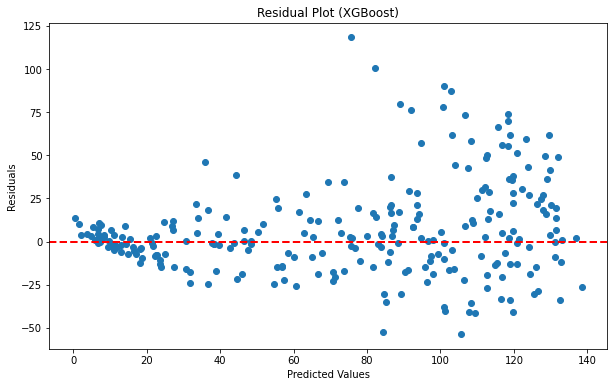

In [43]:
# Step 4: Calculate residuals (difference between actual and predicted values)
residuals = Y_test - Y_pred

# Step 5: Plot residuals against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()